# Importing the relevant libraries

In [1]:
import os
import shutil
from colorthief import ColorThief

## Defining the path to the folders

In [2]:
# Define the path to the folder containing the sneaker images
sneaker_folder = 'fake_images/'

# Define the path to the new folder where images with prices will be copied
sneakers_prices = 'sneakers_prices/'

In [21]:
# Make sure the new folder exists
os.makedirs(sneakers_prices, exist_ok=True)

# Define the price range for assigning prices
min_price = 50  # Minimum price in pounds
max_price = 200  # Maximum price in pounds

# Loop through the files in the sneaker_folder
for filename in os.listdir(sneaker_folder):
    # Get the path to the original shoe image
    src_path = os.path.join(sneaker_folder, filename)

    # Initialize ColorThief object with the shoe image
    color_thief = ColorThief(src_path)

    # Get the dominant color from the shoe image
    dominant_color = color_thief.get_color(quality=1)

    # Calculate the average color value (RGB)
    average_color = sum(dominant_color) / 3

    # Assign a price based on the average color value
    price = int(min_price + (max_price - min_price) * (average_color / 255))

    # Convert the price to a float with one decimal place
    price_with_decimal = price / 10

    # Generate the new filename with the price in pounds
    priced_sneakers = '£' + "{:.1f}".format(price_with_decimal) + '.jpg'

    # Check if the new filename already exists in the sneakers_folder
    counter = 1
    while os.path.exists(os.path.join(sneakers_prices, priced_sneakers)):
        priced_sneakers = '£' + "{:.1f}".format(price_with_decimal) + '_' + str(counter) + '.jpg'
        counter += 1

    # Copy the sneaker image to the new folder with the new filename
    sneaker_path = os.path.join(sneakers_prices, priced_sneakers)
    shutil.copy(src_path, sneaker_path)

print("Prices assigned and images copied with new names successfully.")



Prices assigned and images copied with new names successfully.


## Visualising the Priced Generated Sneaker Images

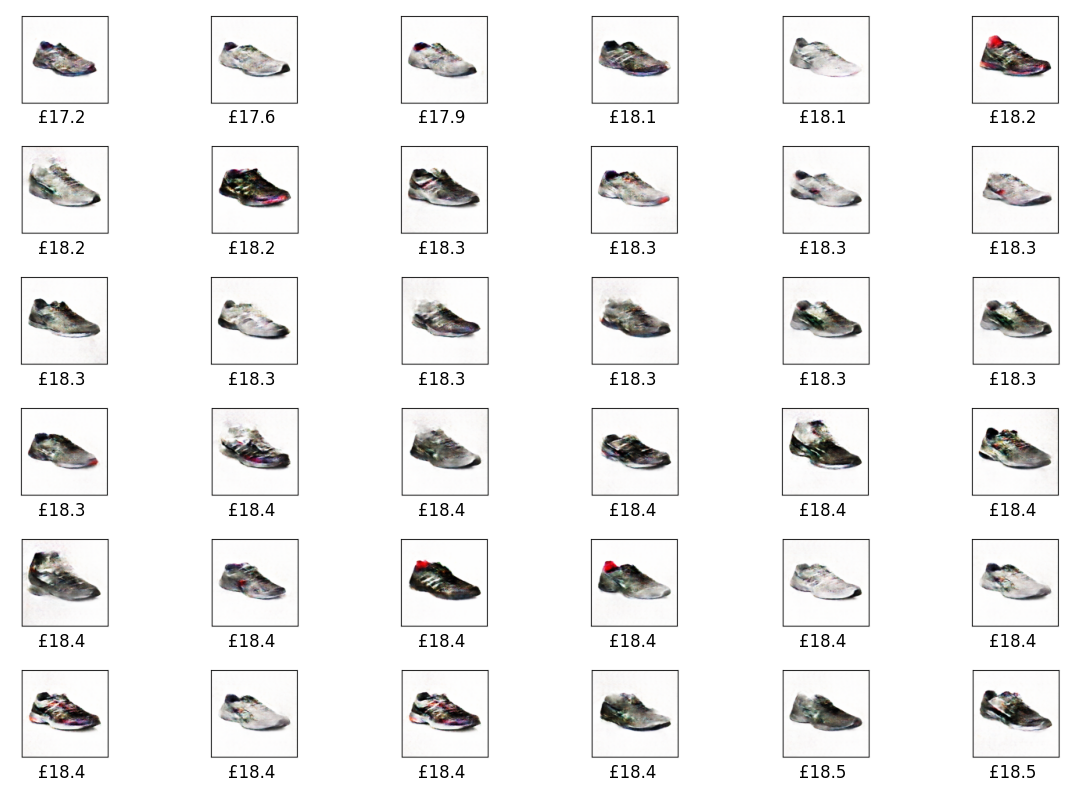

In [18]:
import os
import re
import matplotlib.pyplot as plt

# Define the path to the folder containing the priced sneaker images
sneakers_prices = 'sneakers_prices/'

# Get a list of priced sneaker image filenames
sneaker_files = os.listdir(sneakers_prices)

# Create a figure and set the number of rows and columns for subplots
num_rows = 6
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Loop through the priced sneaker images and plot them with their prices at the bottom
for i, filename in enumerate(sneaker_files):
    if i >= num_rows * num_cols:
        break

    # Get the path to the priced sneaker image
    img_path = os.path.join(sneakers_prices, filename)

    # Plot the image on the corresponding subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

    # Extract the price from the filename using regular expressions
    pattern = r'£(\d+(\.\d+)?)(_?\d+)?\.jpg'
    match = re.match(pattern, filename)
    if match:
        price_str = match.group(1)
        price = float(price_str)
        # Add the price as text at the bottom of the subplot
        ax.text(0.5, -0.1, f'£{price:.1f}', fontsize=12, ha='center', transform=ax.transAxes)
    else:
        print(f"Filename '{filename}' does not match the pattern.")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
